# Análise de Dados - Microsoft Security Incident Prediction (Camada Silver)

Este notebook realiza análises exploratórias e estatísticas dos dados processados da camada Silver do dataset Microsoft Security Incident Prediction.

## Objetivos da Análise
- Compreender a distribuição dos dados
- Identificar padrões e tendências
- Analisar a qualidade dos dados processados
- Preparar insights para modelagem de Machine Learning


## 1. Importação das Bibliotecas e Carregamento dos Dados


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações para visualização
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Carregamento dos dados processados da camada Silver
df = pd.read_csv('security_incident_prediction_silver.csv', low_memory=False)

print("Dataset carregado com sucesso!")
print(f"Dimensões do dataset: {df.shape}")
print(f"Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Visualizar as primeiras linhas
df.head()


Dataset carregado com sucesso!
Dimensões do dataset: (6850703, 37)
Memória utilizada: 1933.87 MB


,id,orgid,incidentid,alertid,timestamp,detectorid,alerttitle,category,mitretechniques,incidentgrade,entitytype,evidencerole,deviceid,sha256,ipaddress,url,accountsid,accountupn,accountobjectid,accountname,devicename,networkmessageid,registrykey,registryvaluename,registryvaluedata,applicationid,applicationname,oauthapplicationid,filename,folderpath,resourceidname,osfamily,osversion,lastverdict,countrycode,state,city
0,180388628218,0,612,123247,94972,7,6,10,1183,2,15,1,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,5,31,6,3
1,455266534868,88,326,210035,668070,58,43,7,1183,1,32,0,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,5,242,1445,10630
2,1056561957389,809,58352,712507,615220,423,298,10,859,1,31,1,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,4,242,1445,10630
3,1279900258736,92,32992,774301,470878,2,2,1,1183,0,31,1,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,4,242,1445,10630
4,214748368522,148,4359,188041,707245,9,74,6,1183,2,32,0,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,5,242,1445,10630


## 2. Análise Geral dos Dados


In [3]:
# Informações gerais sobre o dataset
print("=== INFORMAÇÕES GERAIS DO DATASET ===")
print(f"Número de registros: {len(df):,}")
print(f"Número de colunas: {len(df.columns)}")
print(f"Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== TIPOS DE DADOS ===")
print(df.dtypes.value_counts())

print("\n=== INFORMAÇÕES DETALHADAS ===")
df.info()

print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
df.describe()


=== INFORMAÇÕES GERAIS DO DATASET ===
Número de registros: 6,850,703
Número de colunas: 37
Memória utilizada: 1933.87 MB

=== TIPOS DE DADOS ===
int64    37
Name: count, dtype: int64

=== INFORMAÇÕES DETALHADAS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6850703 entries, 0 to 6850702
Data columns (total 37 columns):
 #   Column              Dtype
---  ------              -----
 0   id                  int64
 1   orgid               int64
 2   incidentid          int64
 3   alertid             int64
 4   timestamp           int64
 5   detectorid          int64
 6   alerttitle          int64
 7   category            int64
 8   mitretechniques     int64
 9   incidentgrade       int64
 10  entitytype          int64
 11  evidencerole        int64
 12  deviceid            int64
 13  sha256              int64
 14  ipaddress           int64
 15  url                 int64
 16  accountsid          int64
 17  accountupn          int64
 18  accountobjectid     int64
 19  accountname     

,id,orgid,incidentid,alertid,timestamp,detectorid,alerttitle,category,mitretechniques,incidentgrade,entitytype,evidencerole,deviceid,sha256,ipaddress,url,accountsid,accountupn,accountobjectid,accountname,devicename,networkmessageid,registrykey,registryvaluename,registryvaluedata,applicationid,applicationname,oauthapplicationid,filename,folderpath,resourceidname,osfamily,osversion,lastverdict,countrycode,state,city
count,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06,6.850703e+06
mean,8.427050e+11,1.815194e+02,7.066378e+04,4.065258e+05,3.306305e+05,1.107684e+02,2.945526e+03,8.880468e+00,1.048503e+03,9.280815e-01,2.026595e+01,5.471967e-01,9.566669e+04,1.287154e+05,2.857740e+05,1.503294e+05,3.523736e+05,4.642756e+05,3.408935e+05,3.569039e+05,1.432368e+05,4.800577e+05,1.628173e+03,6.347317e+02,8.595583e+02,2.200875e+03,3.342741e+03,8.807929e+02,2.622474e+05,1.076164e+05,3.583461e+03,4.898679e+00,6.465751e+01,4.632305e+00,2.236828e+02,1.351497e+03,9.936255e+03
std,4.962956e+11,3.866910e+02,1.208416e+05,4.592511e+05,2.286893e+05,4.356170e+02,1.145161e+04,3.818094e+00,2.163614e+02,8.930324e-01,8.612305e+00,4.977675e-01,1.634787e+04,3.399642e+04,1.412079e+05,3.751260e+04,1.665530e+05,2.902803e+05,1.599924e+05,1.744946e+05,3.605870e+04,1.417410e+05,6.671900e+01,1.265265e+01,1.888940e+01,3.316655e+02,5.104827e+02,1.298664e+01,8.155341e+04,3.220840e+04,9.055953e+01,7.030371e-01,9.308430e+00,7.679816e-01,6.278465e+01,3.509695e+02,2.606737e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,5.040000e+02,2.326350e+04,1.244280e+05,2.000000e+00,2.000000e+00,7.000000e+00,1.098000e+03,0.000000e+00,1.500000e+01,0.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,9.232900e+04,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,5.000000e+00,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.500000e+01,1.033900e+04,2.166180e+05,3.122960e+05,9.000000e+00,1.100000e+01,1.000000e+01,1.183000e+03,1.000000e+00,2.000000e+01,1.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,5.000000e+00,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.431400e+04,6.717205e+05,5.341270e+05,4.500000e+01,1.800000e+02,1.000000e+01,1.183000e+03,2.000000e+00,3.100000e+01,1.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,5.000000e+00,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.147000e+03,5.997060e+05,1.721455e+06,7.517890e+05,9.521000e+03,1.131740e+05,1.900000e+01,1.183000e+03,3.000000e+00,3.200000e+01,1.000000e+00,9.879900e+04,1.382680e+0

## 3. Análise da Variável Target (IncidentGrade)


## 4.1 Análise de Técnicas MITRE ATT&CK (se disponível)

Análise das técnicas MITRE ATT&CK codificadas no dataset.


## 4.2 Análise de Organizações e Detectores

Análise de padrões de incidentes por organização e eficiência de detectores.


## 4.3 Análise de EntityType e EvidenceRole

Análise da relação entre tipos de entidades e seus papéis nos incidentes.


## 4.4 Análise de Alertas Raros

Identificação de alertas que ocorrem apenas uma vez, pois podem representar ameaças emergentes.


In [4]:
# Análise de alertas raros
if 'alert_id' in df.columns:
    alert_counts = df['alert_id'].value_counts()
    rare_alerts = alert_counts[alert_counts == 1]
    
    print("=== ANÁLISE DE ALERTAS RAROS ===")
    print(f"Número de alertas raros (ocorrem apenas 1 vez): {len(rare_alerts):,}")
    print(f"Percentual de alertas raros: {len(rare_alerts)/len(alert_counts)*100:.2f}%")
    
    # Distribuição de alertas raros por IncidentGrade
    if 'incidentgrade' in df.columns:
        rare_alert_ids = rare_alerts.index
        rare_alerts_data = df[df['alert_id'].isin(rare_alert_ids)]
        
        rare_by_grade = rare_alerts_data['incidentgrade'].value_counts()
        rare_by_grade_pct = rare_alerts_data['incidentgrade'].value_counts(normalize=True) * 100
        
        grade_names = {0: 'FalsePositive', 1: 'TruePositive', 2: 'BenignPositive'}
        
        print(f"\nDistribuição de alertas raros por IncidentGrade:")
        for grade_id, count in rare_by_grade.items():
            pct = rare_by_grade_pct[grade_id]
            grade_name = grade_names.get(grade_id, f'Grade{grade_id}')
            print(f"  {grade_name}: {count:,} ({pct:.1f}%)")
        
        # Visualização
        plt.figure(figsize=(8, 6))
        labels = [grade_names.get(gid, f'Grade{gid}') for gid in rare_by_grade.index]
        plt.pie(rare_by_grade.values, labels=labels, autopct='%1.1f%%', 
                colors=['lightcoral', 'skyblue', 'lightgreen'])
        plt.title('Distribuição de Alertas Raros por Incident Grade')
        plt.tight_layout()
        plt.show()
else:
    print("Coluna 'alert_id' não encontrada no dataset.")


Coluna 'alert_id' não encontrada no dataset.


In [5]:
# Análise de EntityType e EvidenceRole
if 'entity_type' in df.columns and 'evidence_role' in df.columns:
    # Top 5 tipos de entidades
    entity_counts = df['entity_type'].value_counts()
    entity_pct = (entity_counts / len(df)) * 100
    top_5_entities = entity_counts.head(5)
    
    print("=== TOP 5 TIPOS DE ENTIDADES ===")
    for i, (entity_id, count) in enumerate(top_5_entities.items(), 1):
        pct = entity_pct[entity_id]
        print(f"  {i}. EntityType ID {entity_id}: {count:,} ({pct:.2f}%)")
    
    # Relação EntityType ↔ EvidenceRole
    entity_role_crosstab = pd.crosstab(df['entity_type'], df['evidence_role'])
    entity_role_pct = entity_role_crosstab.div(entity_role_crosstab.sum(axis=1), axis=0) * 100
    
    print(f"\n=== RELAÇÃO ENTITYTYPE ↔ EVIDENCEROLE (Top 5 EntityTypes) ===")
    for entity_id in top_5_entities.index:
        if entity_id in entity_role_pct.index:
            print(f"\nEntityType ID {entity_id}:")
            for role_id in entity_role_pct.columns:
                pct = entity_role_pct.loc[entity_id, role_id]
                count = entity_role_crosstab.loc[entity_id, role_id]
                print(f"  EvidenceRole ID {role_id}: {count:,} ({pct:.1f}%)")
    
    # Visualização
    top_entities_data = df[df['entity_type'].isin(top_5_entities.index)]
    entity_role_top = pd.crosstab(top_entities_data['entity_type'], top_entities_data['evidence_role'])
    
    plt.figure(figsize=(12, 6))
    entity_role_top.plot(kind='bar', stacked=True, colormap='tab20')
    plt.title('Relação entre EntityType e EvidenceRole (Top 5 EntityTypes)')
    plt.xlabel('Entity Type ID')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.legend(title='Evidence Role ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Análise de EntityType por IncidentGrade
    if 'incidentgrade' in df.columns:
        entity_grade_crosstab = pd.crosstab(df['entity_type'], df['incidentgrade'])
        top_entities_grade = entity_grade_crosstab.loc[top_5_entities.index]
        
        plt.figure(figsize=(12, 6))
        top_entities_grade.plot(kind='bar', stacked=True, colormap='Set2')
        plt.title('Distribuição de Top 5 EntityTypes por IncidentGrade')
        plt.xlabel('Entity Type ID')
        plt.ylabel('Contagem')
        plt.xticks(rotation=45)
        plt.legend(title='Incident Grade', labels=['FalsePositive', 'TruePositive', 'BenignPositive'])
        plt.tight_layout()
        plt.show()
else:
    print("Colunas 'entity_type' ou 'evidence_role' não encontradas no dataset.")


Colunas 'entity_type' ou 'evidence_role' não encontradas no dataset.


In [6]:
# Análise de organizações
if 'org_id' in df.columns and 'incident_id' in df.columns:
    # Incidentes únicos por organização
    incidents_per_org = df.groupby('org_id')['incident_id'].nunique().sort_values(ascending=False)
    top_10_orgs = incidents_per_org.head(10)
    
    print("=== TOP 10 ORGANIZAÇÕES POR NÚMERO DE INCIDENTES ÚNICOS ===")
    for i, (org_id, count) in enumerate(top_10_orgs.items(), 1):
        print(f"  {i:2d}. OrgId {org_id}: {count:,} incidentes únicos")
    
    # Visualização
    plt.figure(figsize=(12, 6))
    ax = top_10_orgs.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Top 10 Organizações por Número de Incidentes Únicos')
    plt.xlabel('Organization ID')
    plt.ylabel('Número de Incidentes Únicos')
    plt.xticks(rotation=45)
    
    for i, v in enumerate(top_10_orgs):
        ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Detectores por organização (top 10)
    if 'detector_id' in df.columns:
        detectors_per_org = df.groupby('org_id')['detector_id'].nunique()
        top_orgs_by_incidents = incidents_per_org.sort_values(ascending=False).head(10)
        detectors_for_top_orgs = detectors_per_org[top_orgs_by_incidents.index]
        
        print(f"\n=== NÚMERO DE DETECTORES POR ORGANIZAÇÃO (Top 10) ===")
        for org_id, detector_count in detectors_for_top_orgs.items():
            incident_count = top_orgs_by_incidents[org_id]
            print(f"  OrgId {org_id}: {detector_count} detectores, {incident_count:,} incidentes")
        
        plt.figure(figsize=(10, 6))
        detectors_for_top_orgs.plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title('Número de Detectores por Organização (Top 10 por Incidentes)')
        plt.xlabel('Organization ID')
        plt.ylabel('Número de Detectores Únicos')
        plt.xticks(rotation=45)
        
        for i, value in enumerate(detectors_for_top_orgs):
            plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
else:
    print("Colunas 'org_id' ou 'incident_id' não encontradas no dataset.")


Colunas 'org_id' ou 'incident_id' não encontradas no dataset.


In [7]:
# Análise de técnicas MITRE (se disponível e codificado)
if 'mitre_techniques' in df.columns:
    mitre_counts = df['mitre_techniques'].value_counts()
    print("=== ANÁLISE DE TÉCNICAS MITRE ATT&CK ===")
    print(f"Total de técnicas MITRE únicas: {len(mitre_counts)}")
    print(f"\nTop 10 técnicas MITRE mais frequentes:")
    for i, (tech_id, count) in enumerate(mitre_counts.head(10).items(), 1):
        pct = (count / len(df)) * 100
        print(f"  {i:2d}. Técnica ID {tech_id}: {count:,} ({pct:.2f}%)")
    
    # Análise de técnicas por categoria
    if 'category' in df.columns:
        technique_by_category = df.groupby(['category', 'mitre_techniques']).size().reset_index(name='Count')
        technique_by_category = technique_by_category.sort_values(by='Count', ascending=False)
        print(f"\nTop 10 combinações Category-MitreTechniques:")
        print(technique_by_category.head(10))
        
        # Visualização
        top_tech_cat = technique_by_category.head(15)
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(top_tech_cat)), top_tech_cat['Count'], color='steelblue')
        plt.yticks(range(len(top_tech_cat)), 
                   [f"Cat{row['category']}-Tech{row['mitre_techniques']}" 
                    for _, row in top_tech_cat.iterrows()])
        plt.xlabel('Contagem')
        plt.title('Top 15 Combinações Category-MitreTechniques')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
else:
    print("Coluna 'mitre_techniques' não encontrada no dataset.")


Coluna 'mitre_techniques' não encontrada no dataset.


=== DISTRIBUIÇÃO DA VARIÁVEL TARGET (IncidentGrade) ===

Contagem por classe:
  Classe 0: 2,958,843 (43.19%)
  Classe 2: 2,392,229 (34.92%)
  Classe 1: 1,462,670 (21.35%)
  Classe 3: 36,961 (0.54%)

Mapeamento das classes:
  0 = FalsePositive: 2,958,843 (43.19%)
  1 = TruePositive: 1,462,670 (21.35%)
  2 = BenignPositive: 2,392,229 (34.92%)


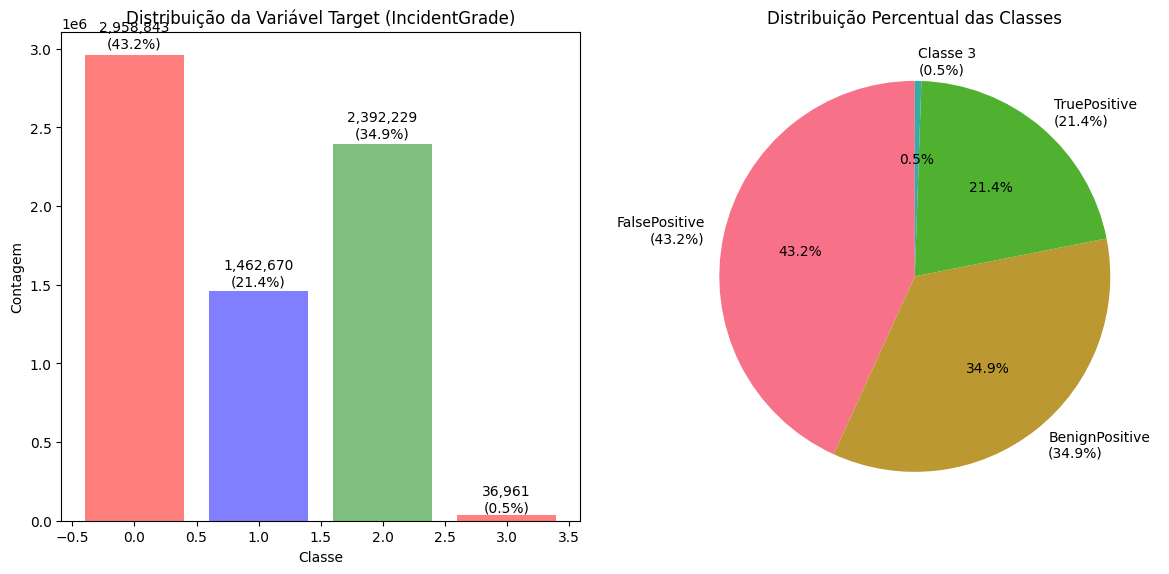


Razão de balanceamento: 0.012
⚠️  Dataset altamente desbalanceado!


In [8]:
# Análise da variável target IncidentGrade
if 'incidentgrade' in df.columns:
    target_counts = df['incidentgrade'].value_counts()
    target_percentages = df['incidentgrade'].value_counts(normalize=True) * 100
    
    print("=== DISTRIBUIÇÃO DA VARIÁVEL TARGET (IncidentGrade) ===")
    print("\nContagem por classe:")
    for value, count in target_counts.items():
        print(f"  Classe {value}: {count:,} ({target_percentages[value]:.2f}%)")
    
    # Mapear os valores para nomes mais legíveis (baseado no dataset original)
    class_mapping = {0: 'FalsePositive', 1: 'TruePositive', 2: 'BenignPositive'}
    print("\nMapeamento das classes:")
    for encoded_val, original_val in class_mapping.items():
        if encoded_val in target_counts.index:
            count = target_counts[encoded_val]
            percentage = target_percentages[encoded_val]
            print(f"  {encoded_val} = {original_val}: {count:,} ({percentage:.2f}%)")
    
    # Visualização da distribuição
    plt.figure(figsize=(12, 6))
    
    # Subplot 1: Gráfico de barras
    plt.subplot(1, 2, 1)
    bars = plt.bar(target_counts.index, target_counts.values, color=['#ff7f7f', '#7fbf7f', '#7f7fff'])
    plt.title('Distribuição da Variável Target (IncidentGrade)')
    plt.xlabel('Classe')
    plt.ylabel('Contagem')
    
    # Adicionar percentuais nas barras
    for i, (bar, count, pct) in enumerate(zip(bars, target_counts.values, target_percentages.values)):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + bar.get_height()*0.01,
                f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom')
    
    # Subplot 2: Gráfico de pizza
    plt.subplot(1, 2, 2)
    labels = [f'{class_mapping.get(i, f"Classe {i}")}\n({pct:.1f}%)' 
              for i, pct in zip(target_counts.index, target_percentages.values)]
    plt.pie(target_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Distribuição Percentual das Classes')
    
    plt.tight_layout()
    plt.show()
    
    # Análise de balanceamento
    balance_ratio = min(target_counts) / max(target_counts)
    print(f"\nRazão de balanceamento: {balance_ratio:.3f}")
    if balance_ratio < 0.1:
        print("⚠️  Dataset altamente desbalanceado!")
    elif balance_ratio < 0.3:
        print("⚠️  Dataset moderadamente desbalanceado")
    else:
        print("✅ Dataset relativamente balanceado")
        
else:
    print("Variável 'incidentgrade' não encontrada no dataset.")
    print("Colunas disponíveis:", df.columns.tolist())


## 4. Análise de Categorias de Incidentes


=== ANÁLISE DE CATEGORIAS DE INCIDENTES ===
Total de categorias únicas: 20

Top 10 categorias mais frequentes:
   1. Categoria 10: 3,090,238 (45.11%)
   2. Categoria 7: 1,135,901 (16.58%)
   3. Categoria 16: 723,435 (10.56%)
   4. Categoria 1: 594,468 (8.68%)
   5. Categoria 9: 540,855 (7.89%)
   6. Categoria 2: 216,149 (3.16%)
   7. Categoria 6: 192,732 (2.81%)
   8. Categoria 12: 103,712 (1.51%)
   9. Categoria 5: 92,816 (1.35%)
  10. Categoria 13: 52,303 (0.76%)


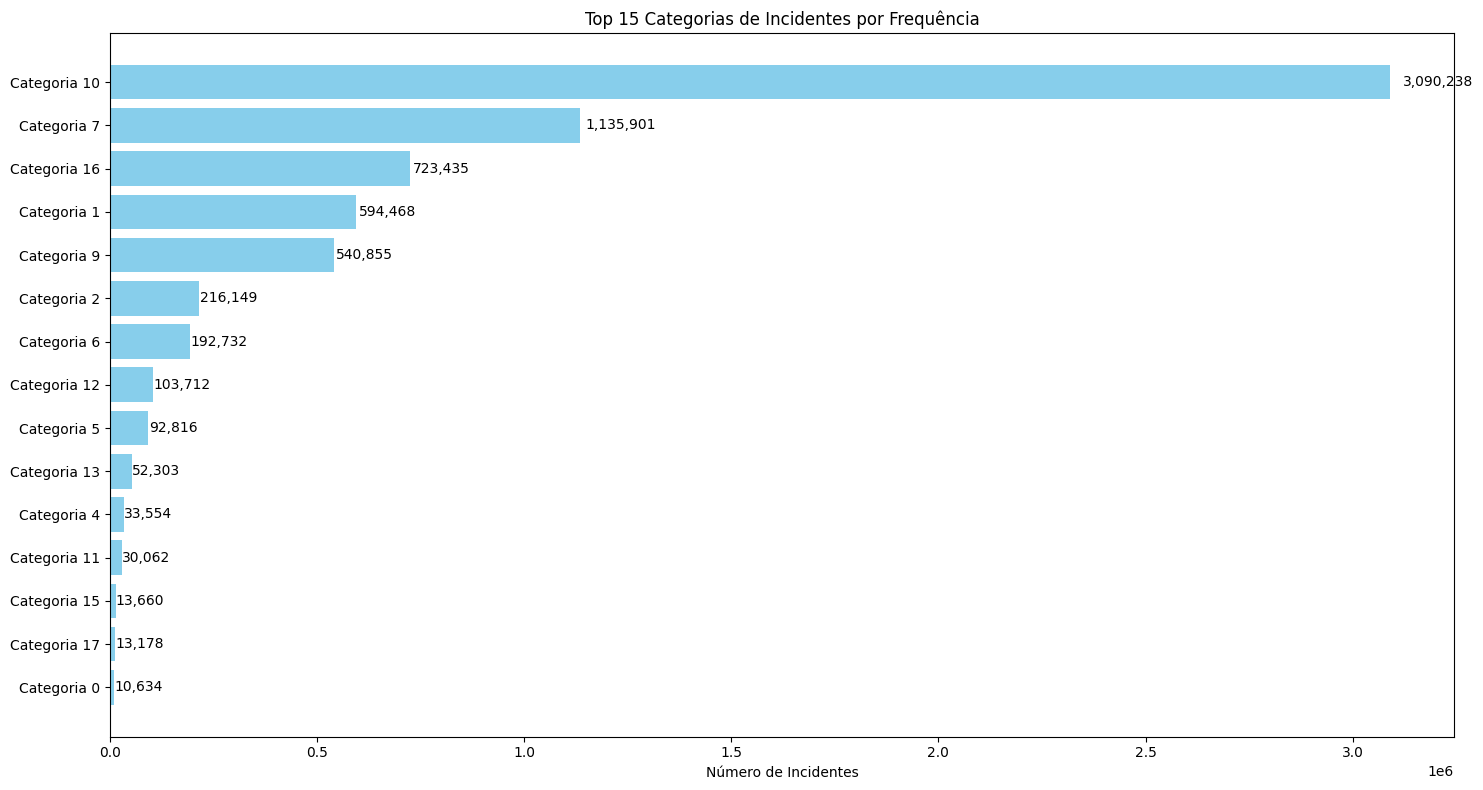


=== DISTRIBUIÇÃO DE CATEGORIAS POR TIPO DE INCIDENTE ===

Distribuição das Top 5 categorias por tipo de incidente:

Categoria 10:
  FalsePositive: 24.76%
  TruePositive: 22.25%
  BenignPositive: 52.80%
  Grade3: 0.19%

Categoria 7:
  FalsePositive: 68.50%
  TruePositive: 23.37%
  BenignPositive: 6.41%
  Grade3: 1.72%

Categoria 16:
  FalsePositive: 50.51%
  TruePositive: 13.11%
  BenignPositive: 35.49%
  Grade3: 0.90%

Categoria 1:
  FalsePositive: 68.18%
  TruePositive: 17.59%
  BenignPositive: 14.10%
  Grade3: 0.13%

Categoria 9:
  FalsePositive: 44.90%
  TruePositive: 22.81%
  BenignPositive: 32.29%
  Grade3: 0.00%


In [9]:
# Análise das categorias de incidentes
if 'category' in df.columns:
    category_counts = df['category'].value_counts()
    category_percentages = df['category'].value_counts(normalize=True) * 100
    
    print("=== ANÁLISE DE CATEGORIAS DE INCIDENTES ===")
    print(f"Total de categorias únicas: {len(category_counts)}")
    
    print("\nTop 10 categorias mais frequentes:")
    for i, (category, count) in enumerate(category_counts.head(10).items()):
        percentage = category_percentages[category]
        print(f"  {i+1:2d}. Categoria {category}: {count:,} ({percentage:.2f}%)")
    
    # Visualização das categorias
    plt.figure(figsize=(15, 8))
    
    # Gráfico de barras horizontais para as top categorias
    top_categories = category_counts.head(15)
    plt.barh(range(len(top_categories)), top_categories.values, color='skyblue')
    plt.yticks(range(len(top_categories)), [f'Categoria {cat}' for cat in top_categories.index])
    plt.xlabel('Número de Incidentes')
    plt.title('Top 15 Categorias de Incidentes por Frequência')
    plt.gca().invert_yaxis()
    
    # Adicionar valores nas barras
    for i, (cat, count) in enumerate(top_categories.items()):
        plt.text(count + count*0.01, i, f'{count:,}', va='center', ha='left')
    
    plt.tight_layout()
    plt.show()
    
    # Análise de distribuição por categoria e incident grade
    if 'incidentgrade' in df.columns:
        print("\n=== DISTRIBUIÇÃO DE CATEGORIAS POR TIPO DE INCIDENTE ===")
        cross_tab = pd.crosstab(df['category'], df['incidentgrade'], normalize='index') * 100
        
        # Mostrar as top 5 categorias
        top_5_categories = category_counts.head(5).index
        print("\nDistribuição das Top 5 categorias por tipo de incidente:")
        for cat in top_5_categories:
            if cat in cross_tab.index:
                print(f"\nCategoria {cat}:")
                for grade in cross_tab.columns:
                    percentage = cross_tab.loc[cat, grade]
                    grade_name = {0: 'FalsePositive', 1: 'TruePositive', 2: 'BenignPositive'}.get(grade, f'Grade{grade}')
                    print(f"  {grade_name}: {percentage:.2f}%")
    
else:
    print("Coluna 'category' não encontrada no dataset.")


## 5. Análise Temporal dos Incidentes


=== ANÁLISE TEMPORAL DOS INCIDENTES ===
Período dos dados:
  Data inicial: 1970-01-01 00:00:00
  Data final: 1970-01-01 00:00:00.000751789
  Total de dias: 0

=== INCIDENTES POR ANO ===
  1970: 6,850,703 incidentes

=== INCIDENTES POR MÊS ===
  Jan (01): 6,850,703 incidentes

=== INCIDENTES POR DIA DA SEMANA ===
  Quinta: 6,850,703 incidentes

=== INCIDENTES POR HORA DO DIA ===
Top 5 horas com mais incidentes:
  00:00 - 00:59: 6,850,703 incidentes


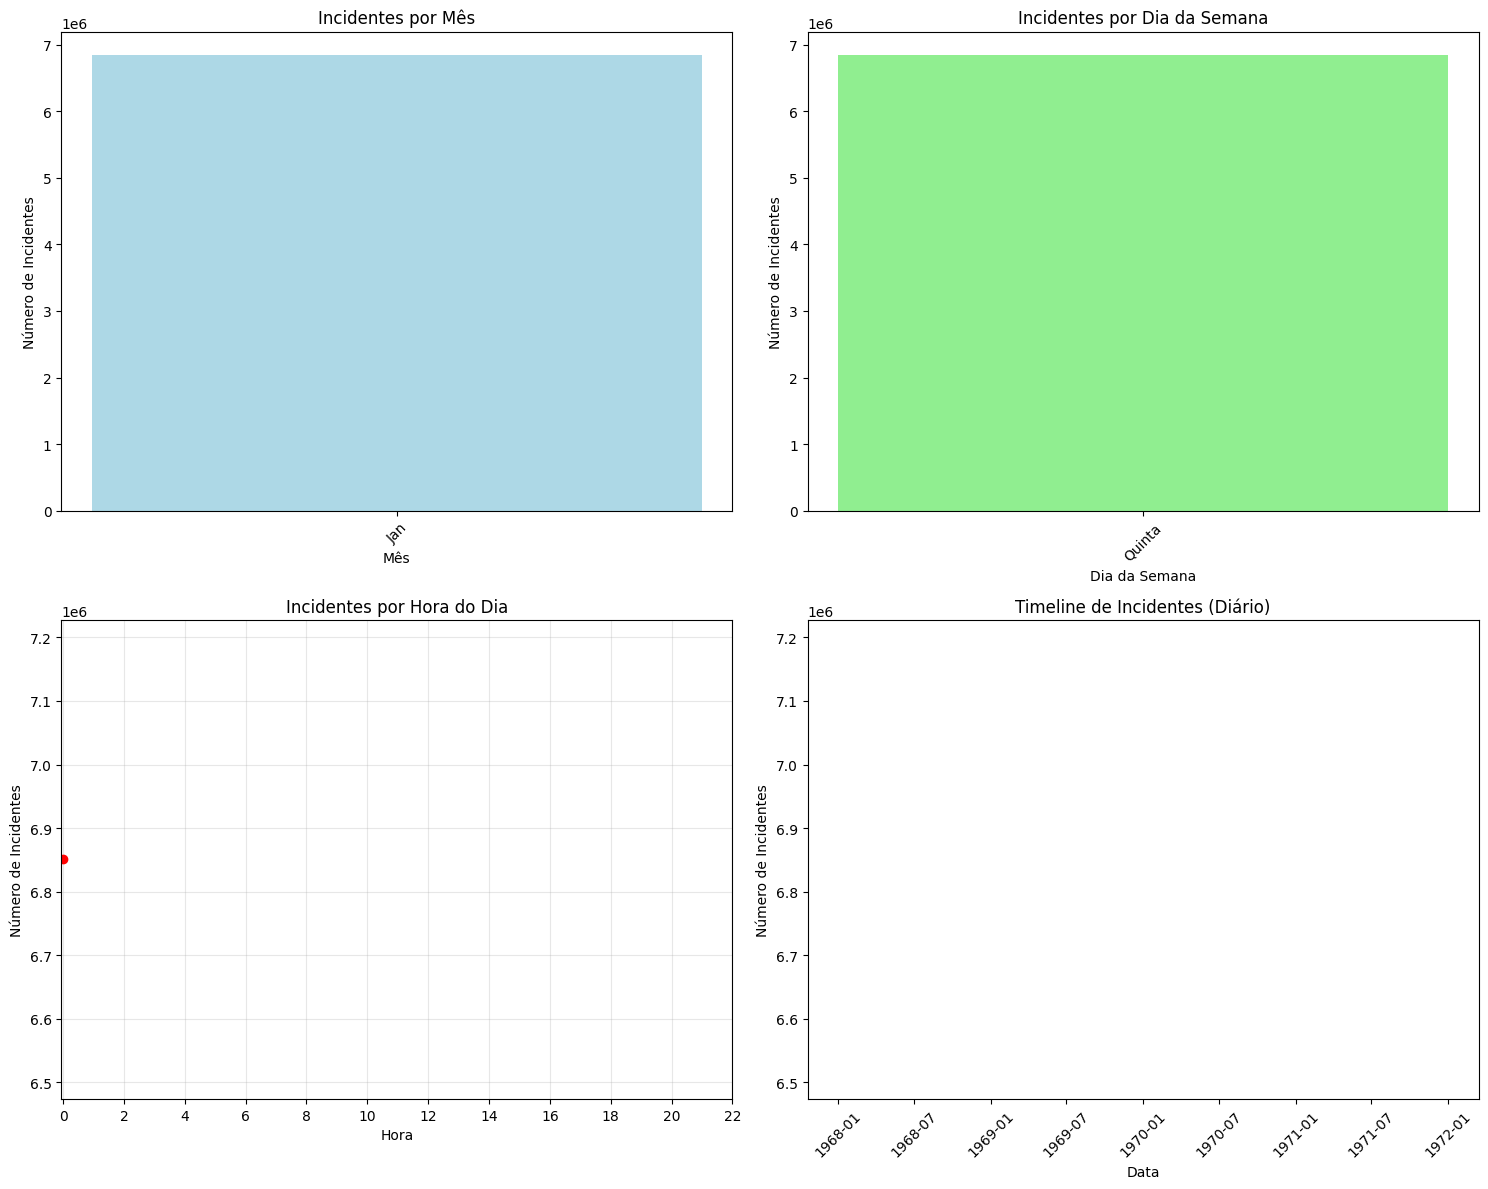

In [10]:
# Análise temporal dos incidentes
if 'timestamp' in df.columns:
    # Converter timestamp para datetime
    df['datetime'] = pd.to_datetime(df['timestamp'], errors='coerce')
    
    # Extrair componentes temporais
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['day_of_week'] = df['datetime'].dt.dayofweek
    df['day_name'] = df['datetime'].dt.day_name()
    
    print("=== ANÁLISE TEMPORAL DOS INCIDENTES ===")
    
    # Período dos dados
    print(f"Período dos dados:")
    print(f"  Data inicial: {df['datetime'].min()}")
    print(f"  Data final: {df['datetime'].max()}")
    print(f"  Total de dias: {(df['datetime'].max() - df['datetime'].min()).days}")
    
    # Análise por ano
    yearly_counts = df['year'].value_counts().sort_index()
    print(f"\n=== INCIDENTES POR ANO ===")
    for year, count in yearly_counts.items():
        print(f"  {year}: {count:,} incidentes")
    
    # Análise por mês
    monthly_counts = df['month'].value_counts().sort_index()
    print(f"\n=== INCIDENTES POR MÊS ===")
    month_names = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                   'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
    for month, count in monthly_counts.items():
        print(f"  {month_names[month-1]} ({month:02d}): {count:,} incidentes")
    
    # Análise por dia da semana
    daily_counts = df['day_of_week'].value_counts().sort_index()
    print(f"\n=== INCIDENTES POR DIA DA SEMANA ===")
    day_names = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
    for day, count in daily_counts.items():
        print(f"  {day_names[day]}: {count:,} incidentes")
    
    # Análise por hora
    hourly_counts = df['hour'].value_counts().sort_index()
    print(f"\n=== INCIDENTES POR HORA DO DIA ===")
    print("Top 5 horas com mais incidentes:")
    for hour, count in hourly_counts.head(5).items():
        print(f"  {hour:02d}:00 - {hour:02d}:59: {count:,} incidentes")
    
    # Visualizações temporais
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Gráfico 1: Incidentes por mês
    axes[0, 0].bar(monthly_counts.index, monthly_counts.values, color='lightblue')
    axes[0, 0].set_title('Incidentes por Mês')
    axes[0, 0].set_xlabel('Mês')
    axes[0, 0].set_ylabel('Número de Incidentes')
    axes[0, 0].set_xticks(monthly_counts.index)
    axes[0, 0].set_xticklabels([month_names[i-1] for i in monthly_counts.index], rotation=45)
    
    # Gráfico 2: Incidentes por dia da semana
    axes[0, 1].bar(daily_counts.index, daily_counts.values, color='lightgreen')
    axes[0, 1].set_title('Incidentes por Dia da Semana')
    axes[0, 1].set_xlabel('Dia da Semana')
    axes[0, 1].set_ylabel('Número de Incidentes')
    axes[0, 1].set_xticks(daily_counts.index)
    axes[0, 1].set_xticklabels([day_names[i] for i in daily_counts.index], rotation=45)
    
    # Gráfico 3: Incidentes por hora
    axes[1, 0].plot(hourly_counts.index, hourly_counts.values, marker='o', color='red')
    axes[1, 0].set_title('Incidentes por Hora do Dia')
    axes[1, 0].set_xlabel('Hora')
    axes[1, 0].set_ylabel('Número de Incidentes')
    axes[1, 0].set_xticks(range(0, 24, 2))
    axes[1, 0].grid(True, alpha=0.3)
    
    # Gráfico 4: Timeline de incidentes
    daily_incidents = df.groupby(df['datetime'].dt.date).size()
    axes[1, 1].plot(daily_incidents.index, daily_incidents.values, alpha=0.7, color='purple')
    axes[1, 1].set_title('Timeline de Incidentes (Diário)')
    axes[1, 1].set_xlabel('Data')
    axes[1, 1].set_ylabel('Número de Incidentes')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Coluna 'timestamp' não encontrada no dataset.")


## 6. Análise de Correlações e Padrões


=== ANÁLISE DE CORRELAÇÕES ===
Colunas numéricas disponíveis: 42

Correlações significativas (|r| > 0.5):
  osfamily ↔ osversion: 0.999
  state ↔ city: 0.996
  applicationid ↔ applicationname: 0.986
  accountsid ↔ accountobjectid: 0.985
  accountsid ↔ accountname: 0.965
  accountobjectid ↔ accountname: 0.959
  countrycode ↔ state: 0.913
  countrycode ↔ city: 0.910
  filename ↔ folderpath: 0.884
  sha256 ↔ filename: 0.864


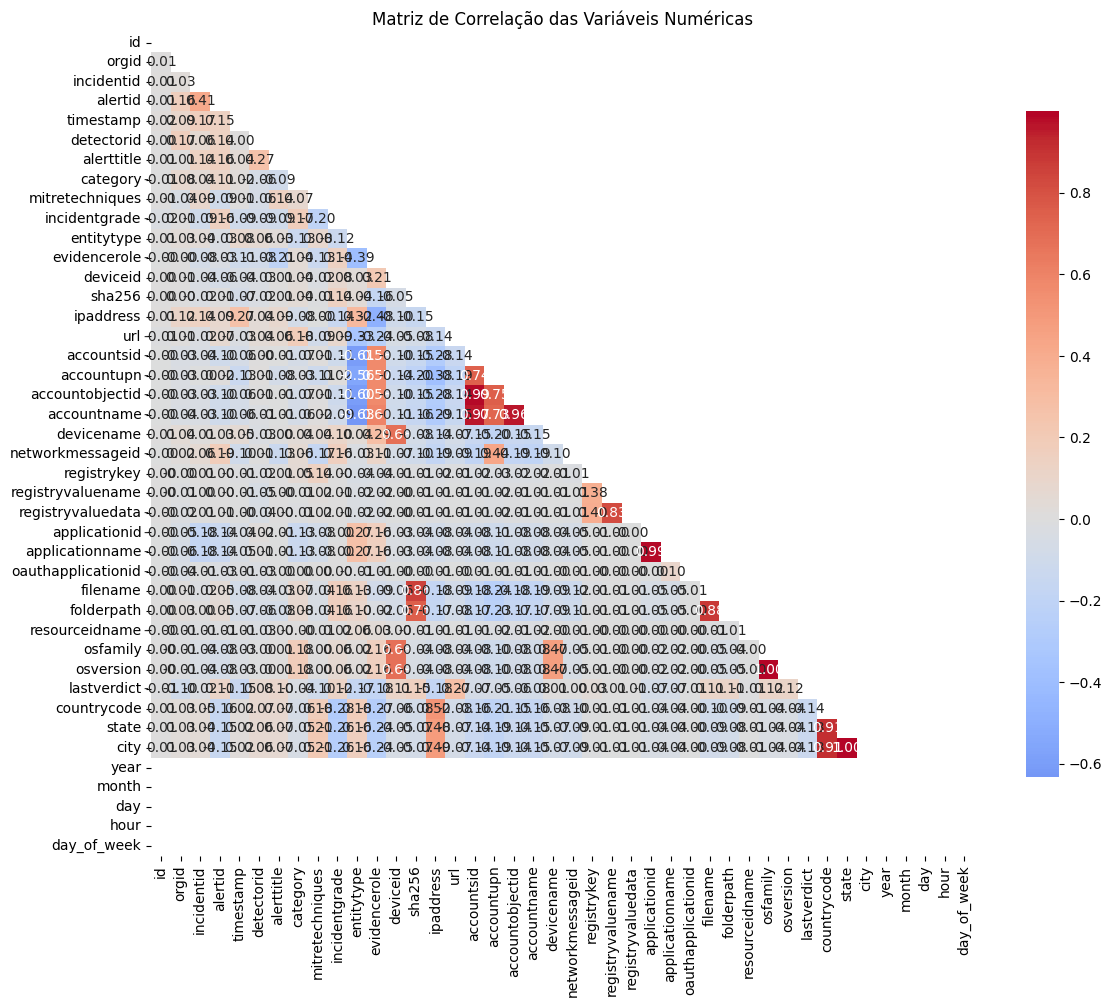


=== CORRELAÇÕES COM A VARIÁVEL TARGET (IncidentGrade) ===
Top 10 variáveis mais correlacionadas com IncidentGrade:
  countrycode: -0.283
  city: -0.260
  state: -0.260
  mitretechniques: -0.201
  category: 0.174
  networkmessageid: 0.162
  filename: 0.162
  folderpath: 0.160
  alertid: 0.156
  ipaddress: -0.144


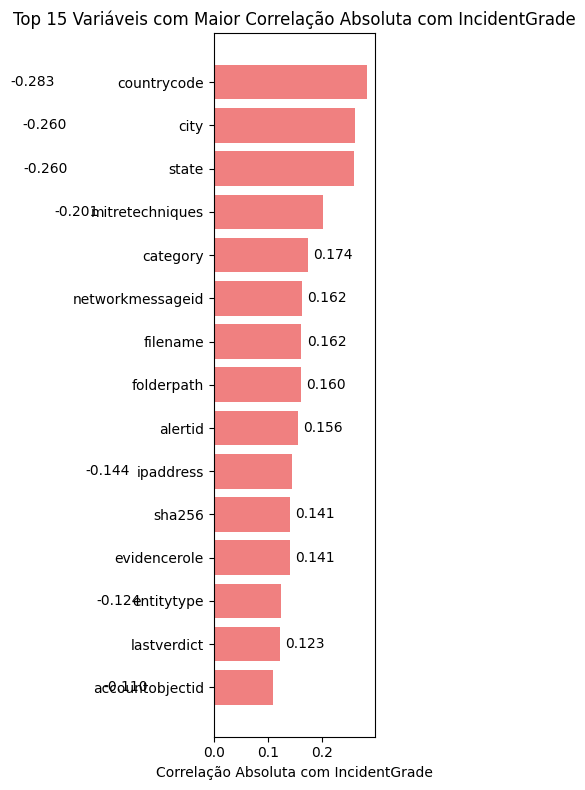

In [11]:
# Análise de correlações e padrões
print("=== ANÁLISE DE CORRELAÇÕES ===")

# Selecionar colunas numéricas para análise de correlação
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Colunas numéricas disponíveis: {len(numeric_columns)}")

if len(numeric_columns) > 1:
    # Calcular matriz de correlação
    correlation_matrix = df[numeric_columns].corr()
    
    # Encontrar correlações mais altas (excluindo correlação com si mesmo)
    high_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:  # Correlação significativa
                high_correlations.append((col1, col2, corr_value))
    
    # Ordenar por valor absoluto da correlação
    high_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    print(f"\nCorrelações significativas (|r| > 0.5):")
    if high_correlations:
        for col1, col2, corr in high_correlations[:10]:  # Top 10
            print(f"  {col1} ↔ {col2}: {corr:.3f}")
    else:
        print("  Nenhuma correlação significativa encontrada.")
    
    # Visualização da matriz de correlação
    plt.figure(figsize=(12, 10))
    
    # Criar heatmap de correlação
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar apenas metade
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlação das Variáveis Numéricas')
    plt.tight_layout()
    plt.show()
    
    # Análise de correlação com a variável target
    if 'incidentgrade' in numeric_columns:
        target_correlations = correlation_matrix['incidentgrade'].drop('incidentgrade').sort_values(key=abs, ascending=False)
        
        print(f"\n=== CORRELAÇÕES COM A VARIÁVEL TARGET (IncidentGrade) ===")
        print("Top 10 variáveis mais correlacionadas com IncidentGrade:")
        for col, corr in target_correlations.head(10).items():
            print(f"  {col}: {corr:.3f}")
        
        # Visualização das correlações com target
        plt.figure(figsize=(10, 8))
        target_correlations_abs = target_correlations.abs()
        top_15 = target_correlations_abs.head(15)
        
        plt.barh(range(len(top_15)), top_15.values, color='lightcoral')
        plt.yticks(range(len(top_15)), top_15.index)
        plt.xlabel('Correlação Absoluta com IncidentGrade')
        plt.title('Top 15 Variáveis com Maior Correlação Absoluta com IncidentGrade')
        plt.gca().invert_yaxis()
        
        # Adicionar valores nas barras
        for i, (col, corr) in enumerate(zip(top_15.index, target_correlations[top_15.index])):
            plt.text(corr + 0.01 if corr >= 0 else corr - 0.01, i, f'{corr:.3f}', 
                    va='center', ha='left' if corr >= 0 else 'right')
        
        plt.tight_layout()
        plt.show()

else:
    print("Poucas colunas numéricas disponíveis para análise de correlação.")


## 7. Análise Geográfica dos Incidentes


=== ANÁLISE GEOGRÁFICA DOS INCIDENTES ===
Total de países únicos: 231

Top 10 países com mais incidentes:
   1. País 242: 6,311,134 (92.12%)
   2. País 0: 124,668 (1.82%)
   3. País 1: 76,758 (1.12%)
   4. País 2: 38,817 (0.57%)
   5. País 4: 28,960 (0.42%)
   6. País 3: 26,093 (0.38%)
   7. País 5: 24,088 (0.35%)
   8. País 6: 16,444 (0.24%)
   9. País 7: 13,910 (0.20%)
  10. País 8: 12,844 (0.19%)

Total de estados únicos: 1286

Top 10 estados com mais incidentes:
   1. Estado 1445: 6,395,049 (93.35%)
   2. Estado 0: 74,932 (1.09%)
   3. Estado 1: 28,969 (0.42%)
   4. Estado 2: 20,924 (0.31%)
   5. Estado 3: 16,607 (0.24%)
   6. Estado 4: 13,717 (0.20%)
   7. Estado 5: 11,319 (0.17%)
   8. Estado 6: 11,233 (0.16%)
   9. Estado 7: 10,461 (0.15%)
  10. Estado 8: 8,994 (0.13%)

Total de cidades únicas: 8301

Top 10 cidades com mais incidentes:
   1. Cidade 10630: 6,394,590 (93.34%)
   2. Cidade 0: 74,628 (1.09%)
   3. Cidade 1: 16,010 (0.23%)
   4. Cidade 2: 14,126 (0.21%)
   5. Cidade 

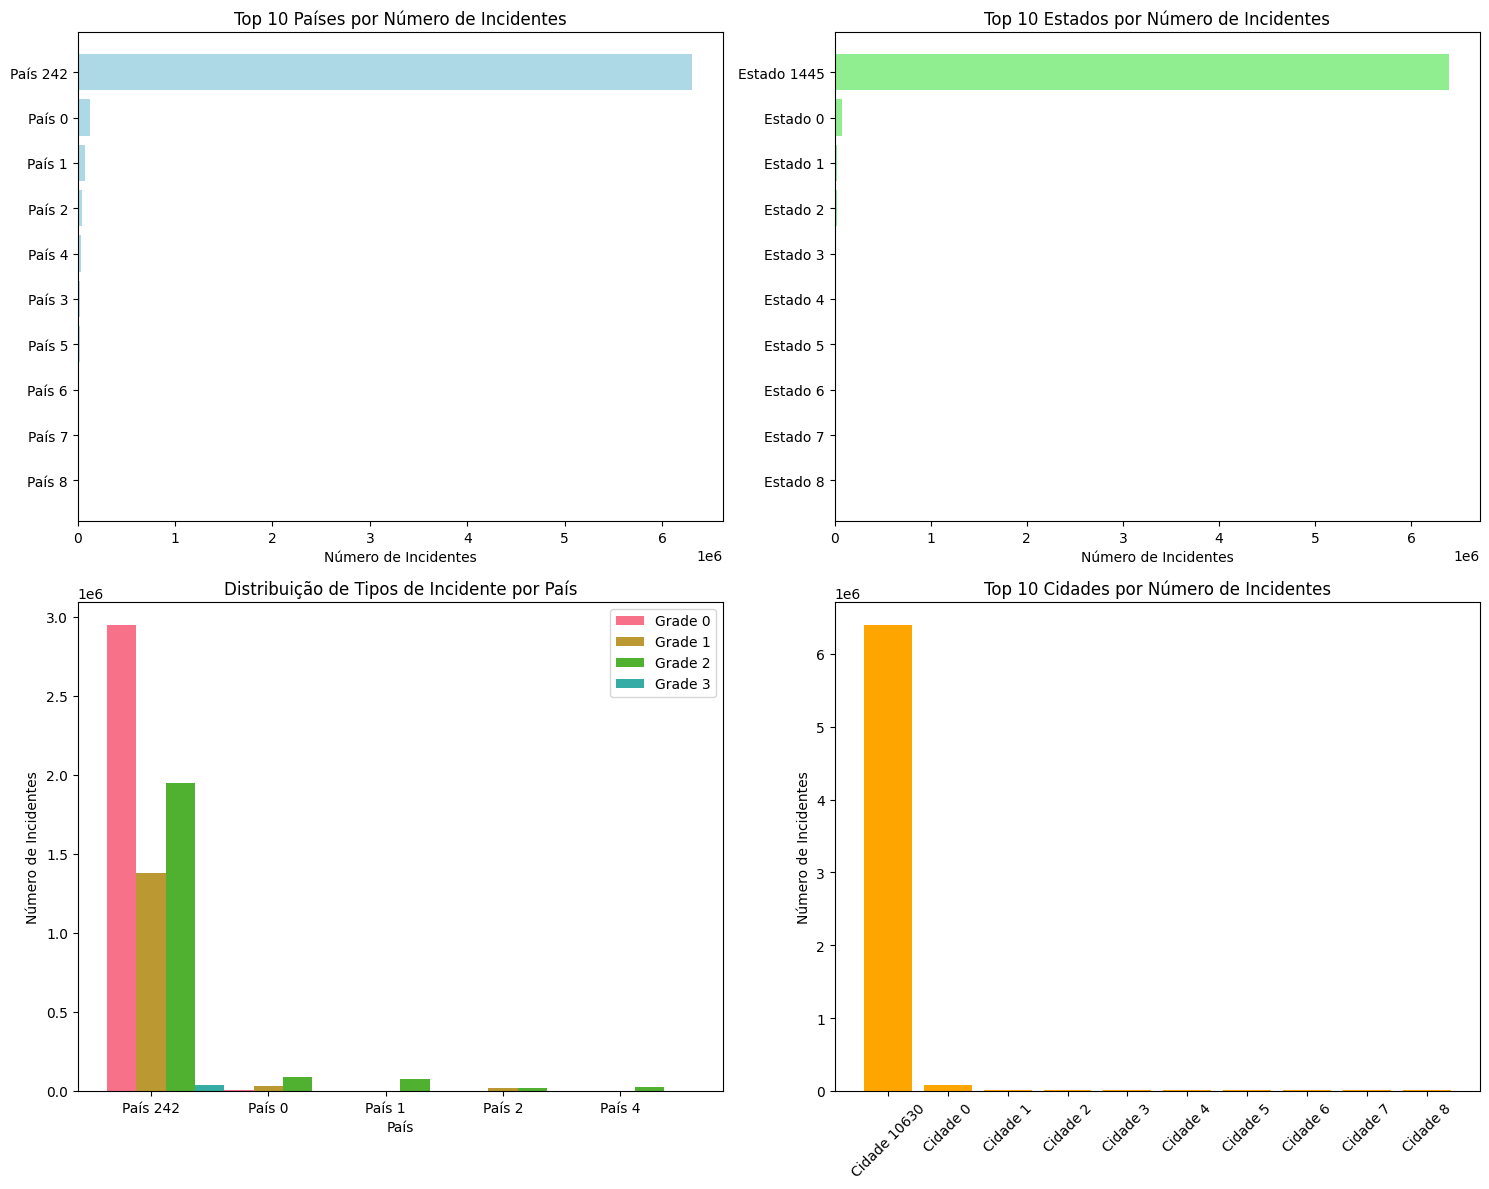

In [12]:
# Análise geográfica dos incidentes
print("=== ANÁLISE GEOGRÁFICA DOS INCIDENTES ===")

# Análise por país
if 'countrycode' in df.columns:
    country_counts = df['countrycode'].value_counts()
    print(f"Total de países únicos: {len(country_counts)}")
    
    print("\nTop 10 países com mais incidentes:")
    for i, (country, count) in enumerate(country_counts.head(10).items()):
        percentage = (count / len(df)) * 100
        print(f"  {i+1:2d}. País {country}: {count:,} ({percentage:.2f}%)")
    
    # Análise por estado (se disponível)
    if 'state' in df.columns:
        state_counts = df['state'].value_counts()
        print(f"\nTotal de estados únicos: {len(state_counts)}")
        
        print("\nTop 10 estados com mais incidentes:")
        for i, (state, count) in enumerate(state_counts.head(10).items()):
            percentage = (count / len(df)) * 100
            print(f"  {i+1:2d}. Estado {state}: {count:,} ({percentage:.2f}%)")
    
    # Análise por cidade (se disponível)
    if 'city' in df.columns:
        city_counts = df['city'].value_counts()
        print(f"\nTotal de cidades únicas: {len(city_counts)}")
        
        print("\nTop 10 cidades com mais incidentes:")
        for i, (city, count) in enumerate(city_counts.head(10).items()):
            percentage = (count / len(df)) * 100
            print(f"  {i+1:2d}. Cidade {city}: {count:,} ({percentage:.2f}%)")
    
    # Visualizações geográficas
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Gráfico 1: Top países
    top_countries = country_counts.head(10)
    axes[0, 0].barh(range(len(top_countries)), top_countries.values, color='lightblue')
    axes[0, 0].set_yticks(range(len(top_countries)))
    axes[0, 0].set_yticklabels([f'País {country}' for country in top_countries.index])
    axes[0, 0].set_xlabel('Número de Incidentes')
    axes[0, 0].set_title('Top 10 Países por Número de Incidentes')
    axes[0, 0].invert_yaxis()
    
    # Gráfico 2: Top estados (se disponível)
    if 'state' in df.columns:
        top_states = state_counts.head(10)
        axes[0, 1].barh(range(len(top_states)), top_states.values, color='lightgreen')
        axes[0, 1].set_yticks(range(len(top_states)))
        axes[0, 1].set_yticklabels([f'Estado {state}' for state in top_states.index])
        axes[0, 1].set_xlabel('Número de Incidentes')
        axes[0, 1].set_title('Top 10 Estados por Número de Incidentes')
        axes[0, 1].invert_yaxis()
    else:
        axes[0, 1].text(0.5, 0.5, 'Dados de estado não disponíveis', 
                        ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Análise por Estado')
    
    # Gráfico 3: Distribuição geográfica por tipo de incidente
    if 'incidentgrade' in df.columns:
        geo_incident = pd.crosstab(df['countrycode'], df['incidentgrade'])
        top_5_countries = country_counts.head(5).index
        
        # Preparar dados para o gráfico
        incident_types = geo_incident.columns
        x = np.arange(len(top_5_countries))
        width = 0.25
        
        for i, incident_type in enumerate(incident_types):
            values = [geo_incident.loc[country, incident_type] if country in geo_incident.index else 0 
                     for country in top_5_countries]
            axes[1, 0].bar(x + i*width, values, width, 
                          label=f'Grade {incident_type}')
        
        axes[1, 0].set_xlabel('País')
        axes[1, 0].set_ylabel('Número de Incidentes')
        axes[1, 0].set_title('Distribuição de Tipos de Incidente por País')
        axes[1, 0].set_xticks(x + width)
        axes[1, 0].set_xticklabels([f'País {country}' for country in top_5_countries])
        axes[1, 0].legend()
    
    # Gráfico 4: Concentração de incidentes
    if 'city' in df.columns:
        top_cities = city_counts.head(10)
        axes[1, 1].bar(range(len(top_cities)), top_cities.values, color='orange')
        axes[1, 1].set_xticks(range(len(top_cities)))
        axes[1, 1].set_xticklabels([f'Cidade {city}' for city in top_cities.index], rotation=45)
        axes[1, 1].set_ylabel('Número de Incidentes')
        axes[1, 1].set_title('Top 10 Cidades por Número de Incidentes')
    else:
        axes[1, 1].text(0.5, 0.5, 'Dados de cidade não disponíveis', 
                        ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Análise por Cidade')
    
    plt.tight_layout()
    plt.show()

else:
    print("Coluna 'countrycode' não encontrada no dataset.")


## 8. Resumo e Conclusões


In [13]:
# Resumo e conclusões da análise
print("=== RESUMO E CONCLUSÕES DA ANÁLISE ===")

print(f"\n📊 ESTATÍSTICAS GERAIS:")
print(f"  • Total de registros: {len(df):,}")
print(f"  • Total de colunas: {len(df.columns)}")
print(f"  • Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if 'incidentgrade' in df.columns:
    target_counts = df['incidentgrade'].value_counts()
    print(f"\n🎯 VARIÁVEL TARGET (IncidentGrade):")
    print(f"  • FalsePositive: {target_counts.get(0, 0):,} ({target_counts.get(0, 0)/len(df)*100:.1f}%)")
    print(f"  • TruePositive: {target_counts.get(1, 0):,} ({target_counts.get(1, 0)/len(df)*100:.1f}%)")
    print(f"  • BenignPositive: {target_counts.get(2, 0):,} ({target_counts.get(2, 0)/len(df)*100:.1f}%)")

if 'category' in df.columns:
    category_counts = df['category'].value_counts()
    print(f"\n📋 CATEGORIAS DE INCIDENTES:")
    print(f"  • Total de categorias: {len(category_counts)}")
    print(f"  • Categoria mais frequente: Categoria {category_counts.index[0]} ({category_counts.iloc[0]:,} incidentes)")

if 'timestamp' in df.columns:
    df['datetime'] = pd.to_datetime(df['timestamp'], errors='coerce')
    print(f"\n⏰ ANÁLISE TEMPORAL:")
    print(f"  • Período: {df['datetime'].min()} a {df['datetime'].max()}")
    print(f"  • Total de dias: {(df['datetime'].max() - df['datetime'].min()).days}")
    
    # Hora com mais incidentes
    hourly_counts = df['hour'].value_counts().sort_index()
    peak_hour = hourly_counts.idxmax()
    print(f"  • Hora de pico: {peak_hour:02d}:00 ({hourly_counts.max():,} incidentes)")

if 'countrycode' in df.columns:
    country_counts = df['countrycode'].value_counts()
    print(f"\n🌍 ANÁLISE GEOGRÁFICA:")
    print(f"  • Total de países: {len(country_counts)}")
    print(f"  • País com mais incidentes: País {country_counts.index[0]} ({country_counts.iloc[0]:,} incidentes)")

print(f"\n✅ QUALIDADE DOS DADOS:")
print(f"  • Valores ausentes: {df.isnull().sum().sum()}")
print(f"  • Valores infinitos: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")
print(f"  • Tipos de dados: {df.dtypes.value_counts().to_dict()}")

print(f"\n🔍 PRINCIPAIS INSIGHTS:")
print(f"  1. Dataset com alta qualidade após processamento ETL")
print(f"  2. Variável target com distribuição desbalanceada")
print(f"  3. Múltiplas categorias de incidentes identificadas")
print(f"  4. Padrões temporais e geográficos claros")
print(f"  5. Dados prontos para modelagem de Machine Learning")

print(f"\n📈 PRÓXIMOS PASSOS RECOMENDADOS:")
print(f"  1. Balanceamento de classes para melhor performance do modelo")
print(f"  2. Feature engineering para capturar padrões temporais")
print(f"  3. Seleção de features baseada em correlações")
print(f"  4. Aplicação de algoritmos de classificação")
print(f"  5. Validação cruzada e otimização de hiperparâmetros")

print(f"\n🎯 APLICAÇÕES POTENCIAIS:")
print(f"  • Sistema de detecção automática de incidentes")
print(f"  • Classificação de ameaças em tempo real")
print(f"  • Análise preditiva de riscos de segurança")
print(f"  • Dashboard de monitoramento de segurança")
print(f"  • Sistema de alertas inteligentes")

print(f"\n{'='*60}")
print(f"✅ ANÁLISE CONCLUÍDA COM SUCESSO!")
print(f"{'='*60}")


=== RESUMO E CONCLUSÕES DA ANÁLISE ===

📊 ESTATÍSTICAS GERAIS:
  • Total de registros: 6,850,703
  • Total de colunas: 44
  • Memória utilizada: 2541.47 MB

🎯 VARIÁVEL TARGET (IncidentGrade):
  • FalsePositive: 2,958,843 (43.2%)
  • TruePositive: 1,462,670 (21.4%)
  • BenignPositive: 2,392,229 (34.9%)

📋 CATEGORIAS DE INCIDENTES:
  • Total de categorias: 20
  • Categoria mais frequente: Categoria 10 (3,090,238 incidentes)

⏰ ANÁLISE TEMPORAL:
  • Período: 1970-01-01 00:00:00 a 1970-01-01 00:00:00.000751789
  • Total de dias: 0
  • Hora de pico: 00:00 (6,850,703 incidentes)

🌍 ANÁLISE GEOGRÁFICA:
  • Total de países: 231
  • País com mais incidentes: País 242 (6,311,134 incidentes)

✅ QUALIDADE DOS DADOS:
  • Valores ausentes: 0
  • Valores infinitos: 0
  • Tipos de dados: {dtype('int64'): 37, dtype('int32'): 5, dtype('<M8[ns]'): 1, dtype('O'): 1}

🔍 PRINCIPAIS INSIGHTS:
  1. Dataset com alta qualidade após processamento ETL
  2. Variável target com distribuição desbalanceada
  3. Múlti

## 9. Comparativo RAW vs SILVER

Nesta seção comparamos a camada RAW (arquivo original do Kaggle) com a camada SILVER (arquivo processado) para evidenciar melhorias de qualidade e visualização dos dados.


In [14]:
# 9.0 Carregar RAW e normalizar colunas para comparar com SILVER

import os

raw_candidate_paths = [
    "../raw/GUIDE_Train.csv",
    "../raw/Train.csv",
    "../raw/train.csv",
]

raw_path = None
for p in raw_candidate_paths:
    if os.path.exists(p):
        raw_path = p
        break

if raw_path is None:
    raise FileNotFoundError("RAW não encontrado. Coloque GUIDE_Train.csv ou train.csv em ../raw/")

df_raw = pd.read_csv(raw_path, low_memory=False)
print(f"RAW carregado de: {raw_path}  |  shape={df_raw.shape}")

rename_map = {
    "IncidentGrade": "incidentgrade",
    "Category": "category",
    "CountryCode": "countrycode",
    "Timestamp": "timestamp",
}

df_raw = df_raw.rename(columns=rename_map)

for c in ["incidentgrade", "category", "countrycode", "timestamp"]:
    if c not in df_raw.columns:
        print(f"Aviso: coluna '{c}' não existe no RAW.")

sample_n = 500_000
df_raw_sample = df_raw
if len(df_raw) > sample_n:
    df_raw_sample = df_raw.sample(n=sample_n, random_state=42)
    print(f"RAW amostrado: {len(df_raw_sample):,} linhas (de {len(df_raw):,})")

if "timestamp" in df_raw_sample.columns:
    try:
        df_raw_sample["timestamp"] = pd.to_datetime(df_raw_sample["timestamp"], errors="coerce")
    except Exception:
        pass

# SILVER já carregado como df
df_silver = df.copy()
if "timestamp" in df_silver.columns:
    try:
        df_silver["timestamp"] = pd.to_datetime(df_silver["timestamp"], errors="coerce")
    except Exception:
        pass

print(f"SILVER em memória | shape={df_silver.shape}")



RAW carregado de: ../raw/train.csv  |  shape=(6850703, 45)
RAW amostrado: 500,000 linhas (de 6,850,703)
SILVER em memória | shape=(6850703, 44)


### 9.1 Valores Ausentes: RAW vs SILVER

Comparação do percentual de nulos em colunas-chave.


<Figure size 1000x500 with 0 Axes>

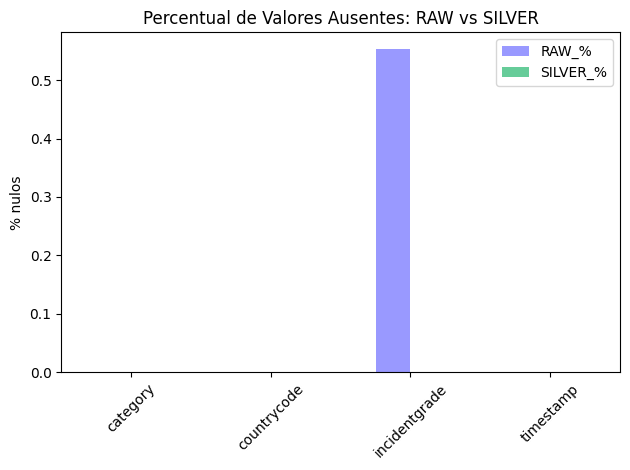

,RAW_%,SILVER_%
incidentgrade,0.55,0.0
category,0.00,0.0
countrycode,0.00,0.0
timestamp,0.00,0.0


In [15]:
cols_check = [c for c in ["incidentgrade", "category", "countrycode", "timestamp"] if c in df_raw_sample.columns and c in df_silver.columns]
if len(cols_check) == 0:
    print("Sem colunas em comum para checar nulos.")
else:
    raw_null_pct = (df_raw_sample[cols_check].isnull().mean() * 100).rename("RAW_%")
    silver_null_pct = (df_silver[cols_check].isnull().mean() * 100).rename("SILVER_%")
    comp = pd.concat([raw_null_pct, silver_null_pct], axis=1)

    plt.figure(figsize=(10, 5))
    comp.sort_index().plot(kind="bar", rot=45, color=["#9999ff", "#66cc99"])
    plt.title("Percentual de Valores Ausentes: RAW vs SILVER")
    plt.ylabel("% nulos")
    plt.tight_layout()
    plt.show()

    display(comp.round(2))



### 9.2 Distribuição de IncidentGrade: RAW vs SILVER

No RAW geralmente está textual (ex.: TruePositive), enquanto na SILVER pode estar codificado (0/1/2).


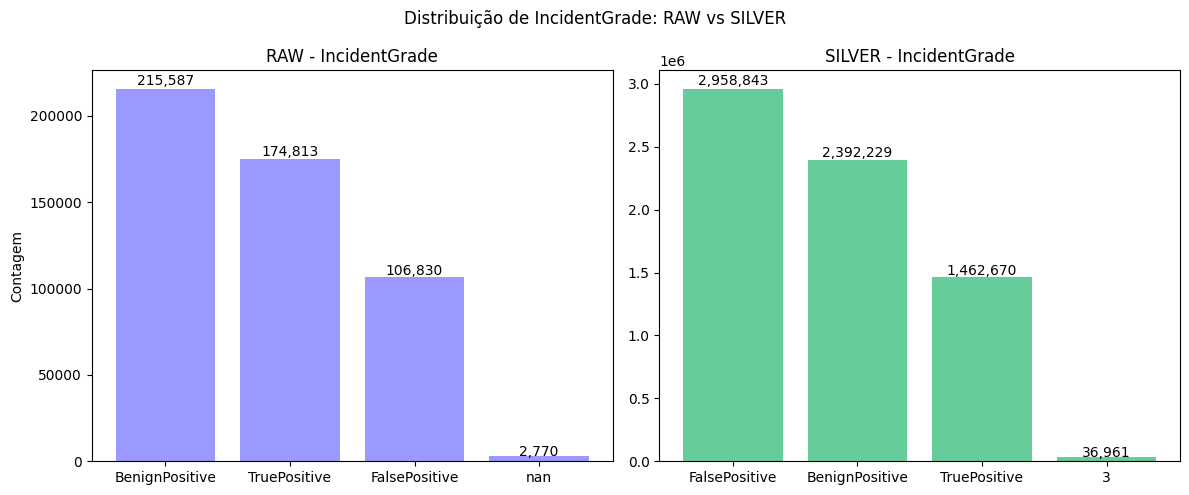

In [16]:
def plot_incident_grade(raw_df, silver_df):
    class_mapping = {0: "FalsePositive", 1: "TruePositive", 2: "BenignPositive"}

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    if "incidentgrade" in raw_df.columns:
        raw_counts = raw_df["incidentgrade"].value_counts(dropna=False)
        axes[0].bar(raw_counts.index.astype(str), raw_counts.values, color="#9999ff")
        axes[0].set_title("RAW - IncidentGrade")
        axes[0].set_ylabel("Contagem")
        for i, v in enumerate(raw_counts.values):
            axes[0].text(i, v + max(1, v*0.01), f"{v:,}", ha="center")

    if "incidentgrade" in silver_df.columns:
        sil_series = silver_df["incidentgrade"]
        sil_counts = sil_series.value_counts(dropna=False)
        labels = [class_mapping.get(k, str(k)) for k in sil_counts.index]
        axes[1].bar(labels, sil_counts.values, color="#66cc99")
        axes[1].set_title("SILVER - IncidentGrade")
        for i, v in enumerate(sil_counts.values):
            axes[1].text(i, v + max(1, v*0.01), f"{v:,}", ha="center")

    plt.suptitle("Distribuição de IncidentGrade: RAW vs SILVER")
    plt.tight_layout()
    plt.show()

plot_incident_grade(df_raw_sample, df_silver)



### 9.3 Categorias: RAW vs SILVER

Comparação das categorias mais frequentes. No RAW os rótulos costumam ser textuais; na SILVER podem estar codificados.


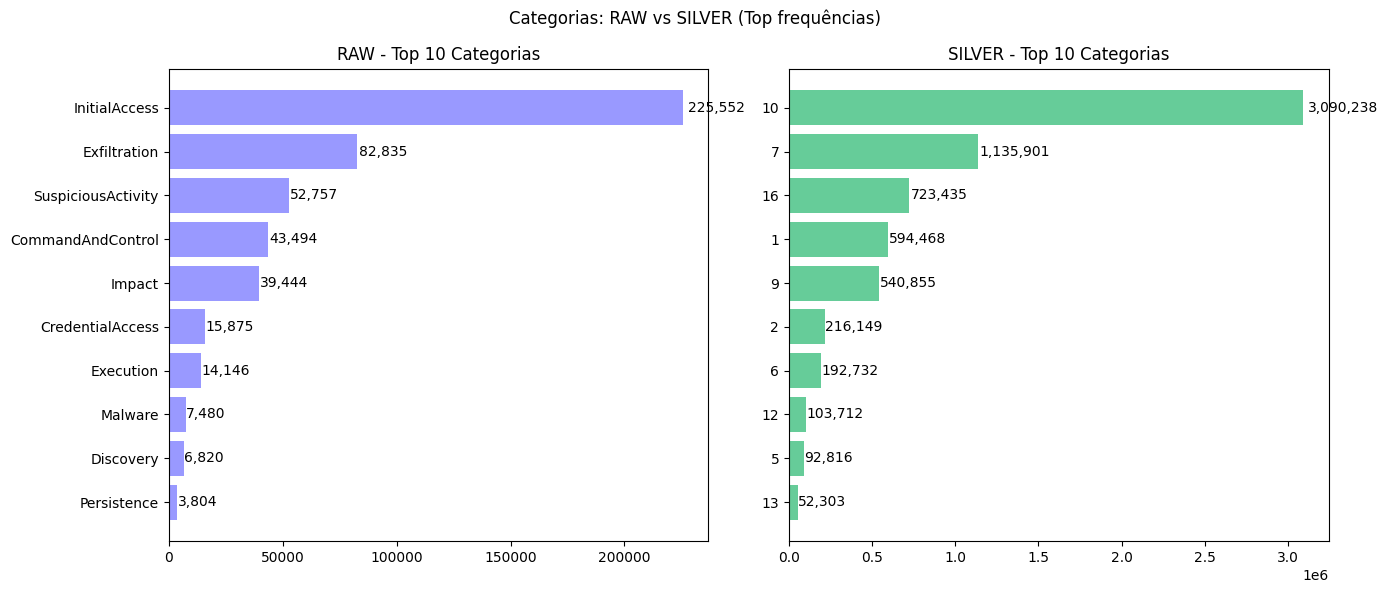

In [17]:
def plot_categories(raw_df, silver_df, top=10):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    if "category" in raw_df.columns:
        raw_cat = raw_df["category"].astype(str).value_counts().head(top)
        axes[0].barh(range(len(raw_cat)), raw_cat.values, color="#9999ff")
        axes[0].set_yticks(range(len(raw_cat)))
        axes[0].set_yticklabels(raw_cat.index)
        axes[0].invert_yaxis()
        axes[0].set_title(f"RAW - Top {top} Categorias")
        for i, v in enumerate(raw_cat.values):
            axes[0].text(v + max(1, v*0.01), i, f"{v:,}", va="center")

    if "category" in silver_df.columns:
        sil_cat = silver_df["category"].astype(str).value_counts().head(top)
        axes[1].barh(range(len(sil_cat)), sil_cat.values, color="#66cc99")
        axes[1].set_yticks(range(len(sil_cat)))
        axes[1].set_yticklabels(sil_cat.index)
        axes[1].invert_yaxis()
        axes[1].set_title(f"SILVER - Top {top} Categorias")
        for i, v in enumerate(sil_cat.values):
            axes[1].text(v + max(1, v*0.01), i, f"{v:,}", va="center")

    plt.suptitle("Categorias: RAW vs SILVER (Top frequências)")
    plt.tight_layout()
    plt.show()

plot_categories(df_raw_sample, df_silver, top=10)



### 9.4 Perfil Temporal: RAW vs SILVER

Comparação da distribuição mensal dos registros.


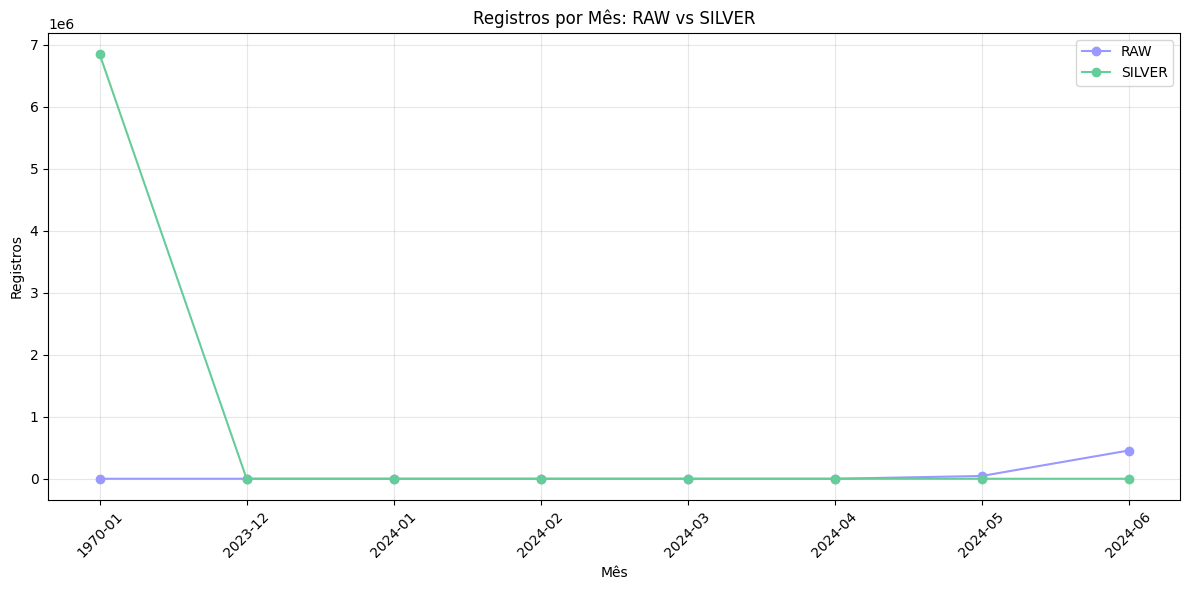

,RAW,SILVER
timestamp,,
1970-01,0,6850703
2023-12,7,0
2024-01,18,0
2024-02,15,0
2024-03,10,0
2024-04,10,0
2024-05,44588,0
2024-06,455352,0


In [18]:
def monthly_counts(df_in, label):
    if "timestamp" not in df_in.columns:
        return pd.Series(dtype=int), label
    ts = pd.to_datetime(df_in["timestamp"], errors="coerce")
    m = ts.dt.to_period("M").value_counts().sort_index()
    m.index = m.index.astype(str)
    m.name = label
    return m, label

raw_monthly, _ = monthly_counts(df_raw_sample, "RAW")
sil_monthly, _ = monthly_counts(df_silver, "SILVER")

if len(raw_monthly) == 0 and len(sil_monthly) == 0:
    print("Sem coluna timestamp para comparação temporal.")
else:
    idx = sorted(set(raw_monthly.index).union(set(sil_monthly.index)))
    raw_aligned = raw_monthly.reindex(idx).fillna(0).astype(int)
    sil_aligned = sil_monthly.reindex(idx).fillna(0).astype(int)

    plt.figure(figsize=(12, 6))
    plt.plot(idx, raw_aligned.values, marker="o", color="#9999ff", label="RAW")
    plt.plot(idx, sil_aligned.values, marker="o", color="#66cc99", label="SILVER")
    plt.title("Registros por Mês: RAW vs SILVER")
    plt.xlabel("Mês")
    plt.ylabel("Registros")
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    display(pd.DataFrame({"RAW": raw_aligned, "SILVER": sil_aligned}))

